<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/SIMULACI%C3%93_A/Animaci%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

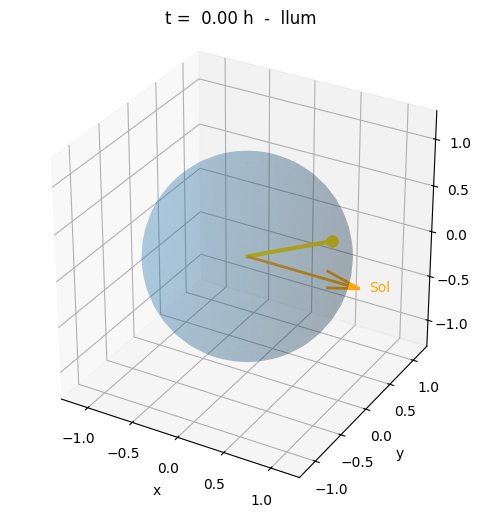

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from google.colab import files

# Constants
graus = np.pi / 180
theta = 23.43333333333333 * graus  # inclinació eix Terra
phi = (41 + 30/60 + 21/3600) * graus  # latitud de Bellaterra 41º 30' 21''
R = 1   # radi de la Terra normalitzat
T = 24 * 3600  # període en segons
omega = 2 * np.pi / T  # velocitat angular en rad/s

# Eix de rotació unitari
k = np.array([np.sin(theta), 0, np.cos(theta)])
k_unit = k / np.linalg.norm(k)

# Vector posició inicial v(0)
v0 = R * np.array([np.sin(theta + phi), 0, np.cos(theta + phi)])

# Direcció cap al Sol
s_unit = np.array([1, 0, 0])

# Definició EDO
def f(t, v):
    return omega * np.cross(k_unit, v)

# Pas de RK4
def rk4_pas(f, t, v, dt):
    k1 = f(t, v)
    k2 = f(t + 0.5*dt, v + 0.5*dt*k1)
    k3 = f(t + 0.5*dt, v + 0.5*dt*k2)
    k4 = f(t + dt,       v + dt*k3)
    return v + (dt/6.0) * (k1 + 2*k2 + 2*k3 + k4)

# Paràmetres de la integració
N = 200
dt = T / N
t = 0.0
v = v0.copy()
ts = np.zeros(N+1)
vs = np.zeros((N+1, 3))
ts[0] = t
vs[0] = v

for n in range(N):
    v = rk4_pas(f, t, v, dt)
    t += dt
    ts[n+1] = t
    vs[n+1] = v # vs[n] vector posició de Bellaterra després de t segons

    # Renormalitzar per mantenir |v| = R (per si deriva una mica)
    v = R * v / np.linalg.norm(v)
    t += dt
    ts[n+1] = t
    vs[n+1] = v

# Animació
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Esfera (Terra)
u = np.linspace(0, 2*np.pi, 50)
v_ang = np.linspace(0, np.pi, 25)
x_esfera = R * np.outer(np.cos(u), np.sin(v_ang))
y_esfera = R * np.outer(np.sin(u), np.sin(v_ang))
z_esfera = R * np.outer(np.ones_like(u), np.cos(v_ang))
ax.plot_surface(x_esfera, y_esfera, z_esfera, alpha=0.2)

# Fletxa cap al Sol
ax.quiver(0, 0, 0, 1.2*R, 0, 0, color='orange', linewidth=2)
ax.text(1.3*R, 0, 0, "Sol", color='orange')

# Línia i punt per al vector posició
line, = ax.plot([], [], [], lw=3)
point, = ax.plot([], [], [], 'o', markersize=8)

# Límits dels eixos
lim = 1.3 * R
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_zlim(-lim, lim)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('')

# Fer que l’escala sigui igual en els tres eixos
ax.set_box_aspect([1, 1, 1])

def update(frame):
    v = vs[frame]

    # coordenades del vector
    x = [0, v[0]]
    y = [0, v[1]]
    z = [0, v[2]]

    line.set_data(x, y)
    line.set_3d_properties(z)

    point.set_data([v[0]], [v[1]])
    point.set_3d_properties([v[2]])

    # costat il·luminat o fosc
    cos_alpha = np.dot(v, s_unit) / (np.linalg.norm(v) * np.linalg.norm(s_unit))
    if cos_alpha > 0: # si el cosinus és positiu és de dia
        color = 'gold'
        estat = 'llum'
    else:
        color = 'black'
        estat = 'foscor'

    line.set_color(color)
    point.set_color(color)

    # temps en hores (no és la hora del dia)
    hores = 24 * frame / (len(vs) - 1)
    ax.set_title(f"t = {hores:5.2f} h  -  {estat}")

    return line, point

# Animació
anim = FuncAnimation(fig, update, frames=len(ts), interval=40, blit=False)

#ES POT O VEURE O DESCARREGAR, LES DUES NO

# Per veure'l al Colab:
HTML(anim.to_html5_video())

# Per descarregar-lo
# anim.save('rotacio_vector_bellaterra.mp4', writer='ffmpeg', fps=25)

# Actualment aquest codi triga uns 2 min en executar-se, cal paciència
